# Latent Dirichlet Allocation

LDA && LDA : There are two methods in machine learning with the initials LDA:
- latent Dirichlet allocation, which is a topic modeling method.
- linear discriminant analysis, which is a classification method.

They are completely unrelated. this can be a little confusing. Scikit-learn has a submodule, sklearn.lda, which implements linear discriminant analysis. Scikit-learn does not implement latent Dirichlet allocation. The simplest topic model is latent dirichlet allocation(LDA).

# Building a topic model

we are going to use the gensim package in Python. 

In [1]:
from __future__ import print_function
from gensim import corpora, models, similarities
from mpltools import style
import matplotlib.pylab as plt
import numpy as np
from os import path
style.use('ggplot')

#if not path.exists('../Building_ML_System/1400OS_04_Codes/data/'):
#    print 'Error : Expected data not exist'

/home/zpgao/anaconda2/lib/python2.7/site-packages/mpltools-0.2.0-py2.7.egg/mpltools/style/__init__.py:42: FutureWarning: 

    The style-sheet functionality in mpltools has been integrated into
    Matplotlib >= 1.4. This module will be removed in a future release.

    Note that style-sheets used by `matplotlib.style` use the standard
    Matplotlib rc-file syntax instead of the INI format used by `mpltools`.
    This mostly means un-quoting strings and changing '=' to ':'.


  """, FutureWarning)
/home/zpgao/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Corpus is just the preloaded list of words
corpus = corpora.BleiCorpus('../Building_ML_System/1400OS_04_Codes/data/ap/ap.dat', 
                            '../Building_ML_System/1400OS_04_Codes/data/ap/vocab.txt')
# This steip will build a topic model
model = models.ldamodel.LdaModel(
    corpus, 
    num_topics=100, 
    id2word=corpus.id2word, 
    alpha=None)

In [12]:
# explore the topics 
topics = [model[c] for c in corpus]

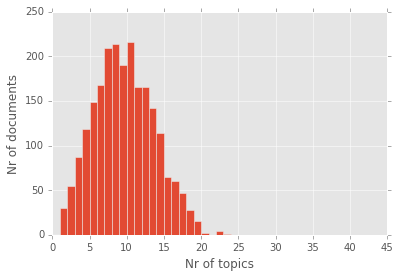

In [9]:
%matplotlib inline
#print topics[0]
thetas = [model[c] for c in corpus]
plt.hist([len(t) for t in thetas], np.arange(42))
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
#plt.savefig('../1400OS_04_01+.png')

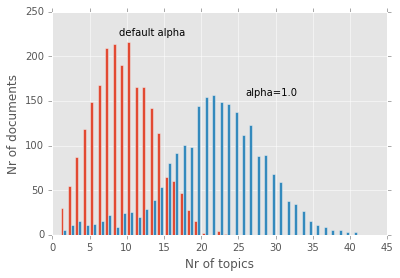

In [10]:
model1 = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1.)
thetas1 = [model1[c] for c in corpus]

#model8 = models.ldamodel.LdaModel(corpus, num_topics=100, id2word=corpus.id2word, alpha=1.e-8)
#thetas8 = [model8[c] for c in corpus]
plt.clf()
plt.hist([[len(t) for t in thetas], [len(t) for t in thetas1]], np.arange(42))
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.text(9,223, r'default alpha')
plt.text(26,156, 'alpha=1.0')
#plt.savefig('../1400OS_04_02+.png')

Sparsity means that while you may have large matrices and vectors, in principe most of the values are 0. 

In the previous graph, we see that 150 documents have 5 topics, while the majority deal with around 10-12. To large extent, this is a function of the alpha parameter used. The bigger values for alpha will result in more topics per document. Apha needs to be positive, but is typically very small usually < 1.

## what are these topics ?

Technically, topics are multinomial distributions over words, which means that the give each word in the vocabulary a probability, Words with high probability are more associated with that topic than words with lower probability.

IN topic modeling, it is important to filter out stop words, as otherwise you might end up with a topic consisting entierly of stop words, which is not very informative. We may also wish to preprocess the text to stems in order to normalize plurals and verv forms.

# Comparing similarity in topic level

NOW that we can have an estimate for each document about how much that document comes from each topic. we can compare the documents in topic level. This means that instead of comparing word per word, we say that two documents are similar if they talk about the same topics. This can be very powerful as tow documents that share a few words may actually refer to the same topic. 

Previously we compared tow documents by comparing their word vectors, we can now compare tow documents by comparing their topic vectors.

For this we are going to project the documents to the topic space. That is we want to have a vector of topics that summarizes the document. Since the number of topics(100) is smaller than the number of possible word(tf-idf words), this means that we have reduced dimensionality. Dimensionality reduction is another task of machine learning. One additional computational advantage is that topic model is much faster to compare 100 vectors of topic weights than vectors of the size of the vocabulary(thousands of terms).

In [14]:
topics = [model[c] for c in corpus]

In [23]:
#print topics[0]
dense = np.zeros( ( len(topics), 100) , float)
for ti, i in enumerate(topics):
    for tj,v in t:
        dense[ti, tj] = v

from scipy.spatial import distance
pairwise = distance.squareform(distance.pdist(dense))

In [24]:
largest = pairwise.max()

In [25]:
for ti in range(len(topics)):
    pairiwise[ti, ti] = largest + 1

In [26]:
def closest_to(doc_id):
    return pairiwise[doc_id].argmin()

In [30]:
closest_to(2)

0

# Choosing the number of topics

we have fixed number of topics = 100. This was an aritray number we could also set to 20 / 2000 topics. Fortunately, for many users, this number does not really matter. If you are going to only use the topics as an intermediate step, the final behavior of the system is rarely very sensitive to the exact number of topics. This means that as long as you use enough topics, whether you use 100 topics or 200 topics, The recommendations that result from the process will not be very different.

one of the methods for autmatically determining the number of topics is called hierarchical Dirichlet process (HDP), and it is available in gensim.